# Voltage Dividers Transistor 

Author : Soroush Saberifar

contact : s.o.r.o.u.s.h.s.a.b.e.r.i.f.a.r@gmail.com

# Layout :

# 1- Introduction

# 2- Basic Voltage Divider

# 3- Voltage Divider with a Transistor

# 4- Solving for 𝑅1 and 𝑅2 in the Voltage Divider 

# 5- Resistor Selection and Accuracy Analysis  

# 6- Sensitivity of the Voltage Divider to Resistor Values

# 7- Bonus: Simulating Component Tolerance

# 8- Solving for an Unknown Resistance  

# 9- Applications  

# 10- Prohibited Uses of Voltage Dividers

# 11- Conclusion

# 12- References


--- 

# 1- Introduction

Voltage dividers are key components in electronics, designed to adjust input voltages to the right levels for different uses.  
They work by connecting two resistors in series, creating a stable voltage that can be used as a reference or input for other parts of a circuit.

When combined with transistors, voltage dividers allow for precise control over current.  
 his setup is often used in circuits where controlling current is crucial, like in LED drivers.  
 The voltage divider sets the base voltage of the transistor, which then controls the current flowing through the load.

This section explores how a voltage divider works with a transistor, focusing on how it helps regulate current through an LED.  
It covers key concepts and equations, with examples to illustrate how they all come together in practice.


# 2- Basic Voltage Divider

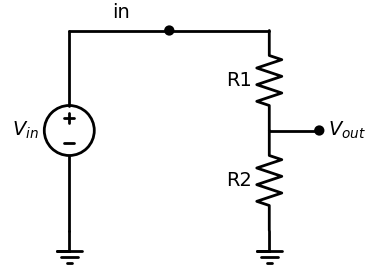

In [125]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing() as d: 
    elm.Ground()
    V = elm.SourceV().label(r'$V_{in}$').length(4)
    elm.Line().right(2).dot().label('in') # input voltage
    elm.Line().right(2)
    elm.Resistor().down(2).label("R1")
    elm.Line().right(1).dot().label(r'$V_{out}$', loc= 'right').hold() # output voltage
    elm.Resistor().down(2).label('R2')
    elm.Ground()

For a simple voltage divider with two resistors R1 and R2 connected in series across a voltage  
source 𝑉𝑖𝑛, the circuit can be analyzed using KVL:  
​  
    1. Total voltage across the circuit is 𝑉𝑖𝑛.  
    2. Voltage drops across R1 and R2 sum up to 𝑉𝑖𝑛:  
                                        $$ V_{in} = V_{R1} + V_{R2} $$  
Using Ohm’s Law (V=IR) and the fact that the same current flows through 𝑅1 and 𝑅2 in a series circuit:  
    $$ V_{in} = I . R_{1} + I . R_{2} $$  

Solving for current I:  
            $$ I = \frac{V_{in}}{R_{1} + R_{2}} $$  

Substituting I back into VR2:  
            $$ V_{out} = V_{R_2} = I . R_{2} = \frac{R_{2}}{R_{1} + R_{2}} \cdot V_{in} $$  


The ratio of resistors 𝑅1 and 𝑅2 in a voltage divider is given by:  

$$
f = \frac{R_2}{R_1 + R_2}
$$
 

This ratio 𝑓 determines the fraction of the input voltage 𝑉𝑖𝑛 that appears across 𝑅2, which is the output voltage Vout.

- If 𝑅2 is very large compared to 𝑅1, 𝑉𝑜𝑢𝑡 approaches 𝑉𝑖𝑛:   
$$
f≈1  =>  Vout ≈ Vin
$$

- If 𝑅2 is very small compared to 𝑅1, 𝑉out approaches zero:  

$$
f ≈ 0 => Vout ≈ 0
$$

- The output voltage is directly proportional to 𝑅2 and the total resistance of the divider.

 # 3- Voltage Divider with a Transistor

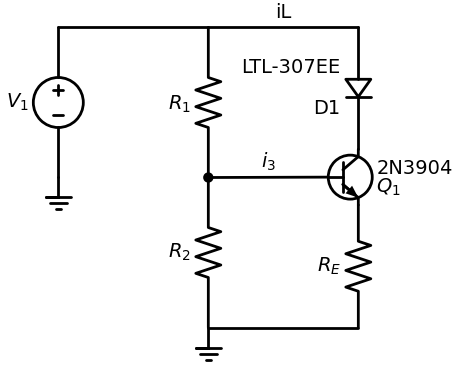

In [126]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing():

    elm.Ground().right()
    elm.SourceV().label('$V_{1}$').up()
    elm.Line().right()
    R1 = elm.Resistor().down().label('$R_1$').dot()
    R2 = elm.Resistor().down().label('$R_2$')
    elm.Ground().hold()
    elm.Line().right()
    elm.Resistor().up(length=2.45).label('$R_E$')
    Q1 = elm.BjtNpn(circle=True).anchor('emitter').right().label(['$Q_1$','2N3904']).scale(.8)
    elm.Diode().up(length=2.45).reverse().label(['D1','LTL-307EE'])
    elm.Line().tox(R1.start).label('iL')
    elm.Line().endpoints(R2.start, Q1.base).label('$i_{3}$')


The circuit is composed of three main parts:

1. Voltage supply and voltage divider: 𝑉𝑖𝑛, 𝑅1, and 𝑅2.
2. Transistor-based current source: 𝑄1 (BJT transistor) and 𝑅𝐸.
3. The load: D1 (LED), which we want to regulate.

The purpose of the voltage divider is to fix the base voltage (𝑉𝐵) of the transistor, which sets the operating point for the entire circuit.

As previous section For a simple unloaded voltage divider, the ratio 𝑓 is given as:  
$$
f = \frac{R_2} {R_1 + R_2} = \frac{V_B} {V_{in}}
$$  
The output voltage 𝑉out, which corresponds to the transistor's base voltage 𝑉𝐵, is related to the input voltage Vin by:

$$
V_{out} = V_{B} = f . V_{in} = \frac{R_2} {R_1 + R_2} . V_{in}  
$$
These equations define the voltage scaling properties of the divider, ensuring that 𝑉𝐵 is set by the ratio of 𝑅2 to the total resistance R1+ R2.

# 4- Solving for 𝑅1 and 𝑅2 in the Voltage Divider 
To set the appropriate base bias voltage (𝑉𝐵) for the transistor, we need to determine the resistances 𝑅1 and 𝑅2.

A loaded voltage divider supplies current to the transistor’s base, making calculations for the base voltage 𝑉𝐵 complex due to the dependence on 𝐼𝐵, the transistor’s properties, and the resistances 𝑅1 and 𝑅2. This creates circular dependencies.To simplify, the voltage divider is assumed to be unloaded, ignoring the small base current 𝐼𝐵. This allows for an approximate calculation of 𝑉𝐵 using the standard voltage divider formula.

Rearranging to express R2/R1:  
$$
\frac{R_2}{R_1} = \frac{f}{1-f}
$$

Example: Setting the Base Voltage
Suppose:

- Vin =9V,
- Desired base voltage VB = 1.5V,
- Using 𝑅1 and 𝑅2 as the voltage divider.

1. Calculate 𝑓, the voltage divider ratio:  
$$ 
f = \frac{V_B} {V_{in}} = \frac{1.5}{9} = 0.167
$$
2. Solve for R2/R1 :  
$$ 
\frac{R_2}{R_1} = \frac{f}{1-f} = \frac{0.167} {1-0.167} = \frac{0.167}{0.833} ≈ 0.2
$$

This implies that 𝑅2 should be 20% of 𝑅1 . For example, if 𝑅1=10kΩ, then kΩ R2 =2kΩ.

# 5- Resistor Selection and Accuracy Analysis  
Once the resistor ratio 𝑅2/𝑅1 has been determined, the next step is to select the absolute values of 𝑅1 and 𝑅2. The selection depends on practical considerations such as power consumption, heat dissipation, and voltage accuracy. Here's a step-by-step breakdown:  

1. Trade-offs Between Small and Large Resistances  

Case 1: Small Resistances  
- Current Consumption: Small resistances result in a high current through the divider:
$$ 
I = \frac{V_{in}} {R_1 + R_2}
$$
- Power Consumption: High current increases power dissipation:
$$
P = \frac{V_{\text{in}}^2} {R_1 + R_2}
$$
- Heat Dissipation: Higher power consumption can lead to heat dissipation issues, requiring careful resistor selection to avoid overheating or inefficiency.  

Case 2: Large Resistances 
 
- Low Current Consumption: Larger resistances reduce power consumption and heat dissipation.
- Voltage Error Due to Loading: Larger resistances increase voltage error due to the loading effect of the transistor’s base current:
$$  
∣V_{err}∣ = I_B . ( R_1 || R_2)  
$$
2. Setting a Voltage Tolerance  
To balance power consumption and accuracy, we choose a maximum acceptable voltage error. A commonly used tolerance   is 5%, which means the output voltage Vout is:
$$
V_{out} = 1.5 . V \pm 5\% = 1.5 V \pm 0.075 V:  
$$
Thus, the maximum allowable error in voltage is:  
$$
∣V_{err} ∣≤75mV
$$

Step 2: Limiting the Parallel Resistance  
For a loaded voltage divider, the voltage error is:  
$$
|V_{err}| = I_3 . (R_1 || R_2)
$$

Where 𝐼3 (base current of the transistor) is a small fraction of the collector current IL. Assuming 𝐼𝐿 = 20 mA and:  
$$
\frac{I_3}{I_L} ≈  \frac{1}{200} ⇒ I_3 ≤ \frac{20 mA}{200} = 100 μA
$$

Substituting into the error equation:
$$
∣V_{err}∣= I_3 ⋅ (R_1 || R_2) ≤ 75 mA  
$$
$$
(R_1 || R_2) ≤ \frac{75 mA}{100 μA} = 750 Ω
$$

Step 3: Calculate Absolute Resistor Values

From the parallel resistance condition:
$$
R_1 || R_2 = \frac{R_1 . R_2} {R_1 + R_2} ≤ 750 Ω
$$

Substituting 𝑅2 = 0.2 ⋅𝑅1:  
$$
\frac{ R_1 . (0.2 . R_1)} {R_1 + (0.2 . R_1)} ≤ 750 Ω
$$
$$
\frac{0.2 . R_{\text{1}^2}} {1.2 .R_1} ≤ 750 Ω
$$

Simplifying:  
$$ 
\frac{0.2}{1.2} .R_1 ≤ 750 Ω
$$
$$
R_1 ≤ \frac{750 . 1.2} {0.2} = 4500 Ω
$$  
Thus:  
- R1 ≤4.5kΩ
- R2 = 0.2 ⋅ R1 ≤ 0.2 ⋅ 4.5 kΩ = 900Ω  

Final Resistor Selection  

Choose 𝑅1 = 4.3kΩ and R2 = 860Ω, which satisfy both the resistor ratio and the parallel resistance requirement.  

This selection ensures the desired base voltage (VB =1.5V) with minimal voltage error (≤75mV) and balances power consumption with accuracy.

Here’s our final LED current control circuit with R1 and R2 in place:

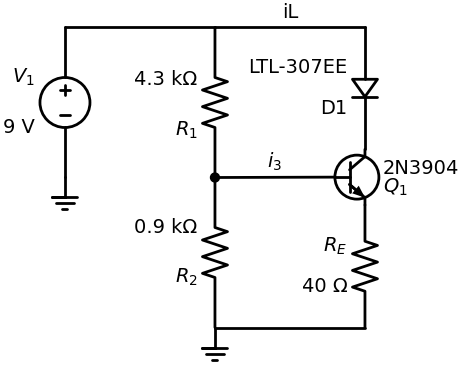

In [127]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing():

    elm.Ground().right()
    elm.SourceV().label(['9 V','$V_{1}$']).up()
    elm.Line().right()
    R1 = elm.Resistor().down().label(['4.3 kΩ','$R_1$']).dot()
    R2 = elm.Resistor().down().label(['0.9 kΩ','$R_2$'])
    elm.Ground().hold()
    elm.Line().right()
    elm.Resistor().up(length=2.45).label(['40 Ω','$R_E$'])
    Q1 = elm.BjtNpn(circle=True).anchor('emitter').right().label(['$Q_1$','2N3904']).scale(.8)
    elm.Diode().up(length=2.45).reverse().label(['D1','LTL-307EE'])
    elm.Line().tox(R1.start).label('iL')
    elm.Line().endpoints(R2.start, Q1.base).label('$i_{3}$')


In the simulation of this circuit, the following parameters are used to analyze the behavior of the voltage divider :  
Circuit Parameters
- Vin = 9V
- R1 =4.3kΩ, 𝑅2 Ω = 860Ω
- RE = 40Ω  
- Transistor: 2N3904
- Desired base voltage 𝑉𝐵 = 1.5 VB = 1.5V and collector current IC = 20mA.

In [128]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Voltage Divider with Transistor and LED')

circuit.V(1, 'Vin', circuit.gnd, 9@u_V)

circuit.R(1, 'Vin', 'Base', 4.3@u_kΩ)  # R1
circuit.R(2, 'Base', circuit.gnd, 900@u_Ω)  # R2
circuit.R(3, 'Emitter', circuit.gnd, 40@u_Ω)  # RE

# Define transistor model
circuit.model('2N3904', 'NPN',
              IS=6.73e-14, BF=200, VAF=100,
              IKF=0.3, CJE=4.5e-12, CJC=3.5e-12,
              VJE=0.75, VJC=0.75, TF=400e-12, TR=25e-9)

circuit.BJT(1, 'Collector', 'Base', 'Emitter', model='2N3904')

# Define diode model
circuit.model('LTL307EE', 'D', IS=1e-14, N=1.7, RS=20@u_Ω)
circuit.D(1, 'Collector', 'Vin', model='LTL307EE')

# Perform DC analysis
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

# Print voltages
print("\nNode Voltages:")
for node in ('Vin', 'Base', 'Collector', 'Emitter'):
    try:
        print(f"{node}: {float(analysis[node])} V")
    except KeyError:
        print(f"{node}: No voltage data available")




Node Voltages:
Vin: 9.0 V
Base: 0.6716050513373826 V
Collector: 0.0656122360284784 V
Emitter: 0.04762432834528672 V


C:\Users\Soroush\AppData\Local\Temp\ipykernel_25148\2535260936.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{node}: {float(analysis[node])} V")


# 6- Sensitivity of the Voltage Divider to Resistor Values

In many circuits, the ratio \( $ f =  \frac{R_2}{R_1} $ \) determines the behavior of the voltage divider. However, the absolute values of  \( $ R_1 $ \) and \( $ R_2 $ \)  can still significantly impact the performance of the circuit, particularly in terms of:
1. **Power Consumption**: Larger resistances reduce power consumption, while smaller resistances increase it.
2. **Stability**: Extremely large resistances can make the circuit more sensitive to external noise and loading effects.

To study this sensitivity, we define a scaling factor \( x \) and allow the resistor values to scale proportionally:
$
R_1 = x, \quad R_2 = 0.52x
$ 

### Behavior of the Circuit with Varying \( x \)
Using a simulator, analysing the circuit with the following:
- A DC Sweep is applied over the parameter \( x \) to study the output voltage and power dissipation.
- The results are plotted to observe:
  1. The behavior of the LED current as \( x \) changes.
  2. The heat dissipation in the resistors.

---

### **Key Observations**
1. **Point of Stability**:
   - A "knee" point is observed in the plot of LED current, where the circuit performance starts to degrade rapidly for smaller \( x \).
   - By selecting \( x \) just before the knee, we achieve stable behavior with minimal power dissipation.

2. **Power Dissipation**:
   $
   P = I^2 R
   $
   As \( $ R_1 $ \) and \( $ R_2 $ \) increase, power dissipation decreases.

3. **Practical Design Trade-offs**:
   - **Small \( x \)**: Higher power consumption, more heat.
   - **Large \( x \)**: Reduced power consumption, but increased sensitivity to noise and loading effects.



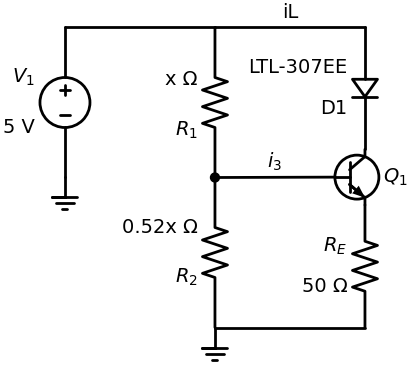

In [129]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing():

    elm.Ground().right()
    elm.SourceV().label(['5 V','$V_{1}$']).up()
    elm.Line().right()
    R1 = elm.Resistor().down().label(['x Ω','$R_1$']).dot()
    R2 = elm.Resistor().down().label(['0.52x Ω','$R_2$'])
    elm.Ground().hold()
    elm.Line().right()
    elm.Resistor().up(length=2.45).label(['50 Ω','$R_E$'])
    Q1 = elm.BjtNpn(circle=True).anchor('emitter').right().label('$Q_1$').scale(.8)
    elm.Diode().up(length=2.45).reverse().label(['D1','LTL-307EE'])
    elm.Line().tox(R1.start).label('iL')
    elm.Line().endpoints(R2.start, Q1.base).label('$i_{3}$')


## Analysis with PySpice
The voltage divider circuit is analyzed by simulating the effect of varying resistor values \( $ R_1 $ \) and \( $ R_2 $ \), observing the changes in output voltage and power dissipation :

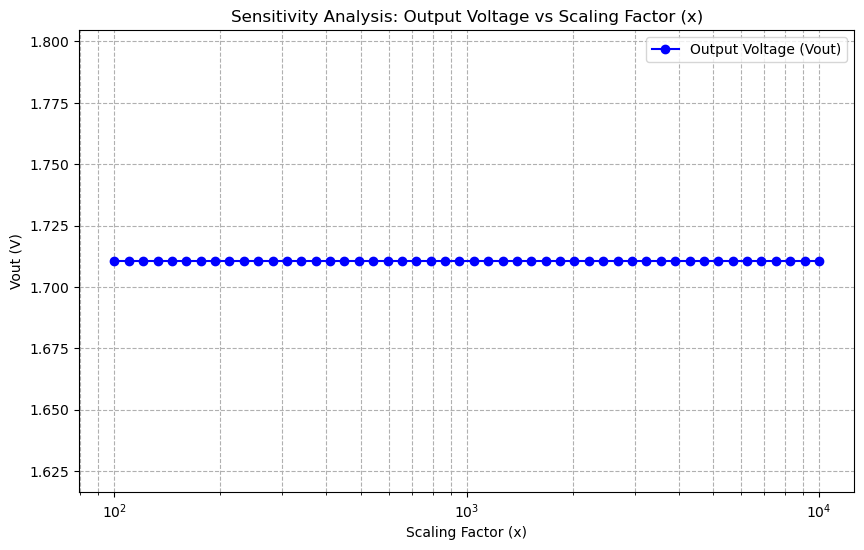

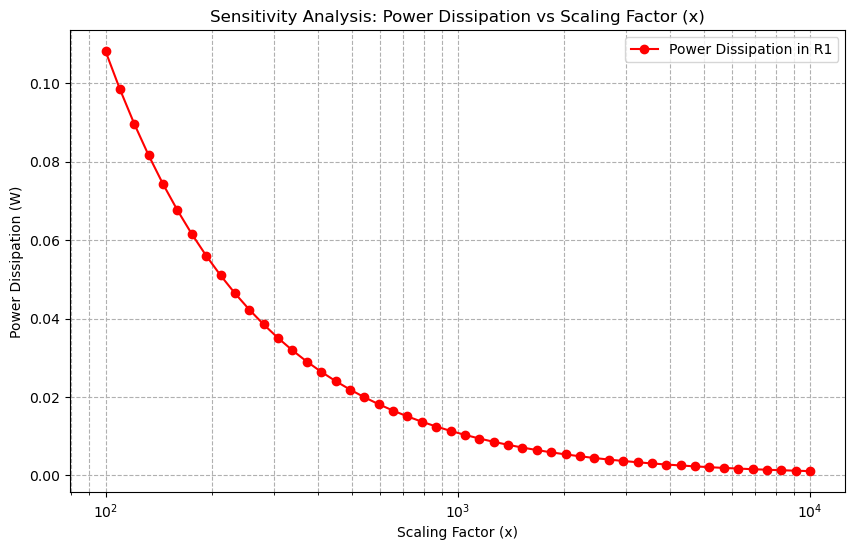

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Sensitivity Analysis of Voltage Divider')

circuit.V(1, 'Vin', circuit.gnd, 5@u_V)  # Vin = 5V

x_values = np.logspace(2, 4, 50)  # x from 10^2 to 10^4 (log scale)
voltages = []
powers = []

# Perform simulations for varying x
for idx, x in enumerate(x_values):
    R1 = x  
    R2 = 0.52 * x
    
    # Use dynamic names for resistors to avoid conflicts
    circuit.R(f'R1_{idx}', 'Vin', 'Vout', R1 @ u_Ω)
    circuit.R(f'R2_{idx}', 'Vout', circuit.gnd, R2 @ u_Ω)
    
    simulator = circuit.simulator(temperature=25)
    analysis = simulator.operating_point()
    
    # Output voltage (Vout)
    Vout = float(analysis['Vout'].item())  # Convert to scalar
    voltages.append(Vout)
    
    # Power dissipation in R1
    I_R1 = (5 - Vout) / R1  # Current through R1
    power_R1 = (I_R1**2) * R1  # Power dissipation
    powers.append(power_R1)

# Plot Vout vs x
plt.figure(figsize=(10, 6))
plt.semilogx(x_values, voltages, marker='o', label='Output Voltage (Vout)', color='b')
plt.title('Sensitivity Analysis: Output Voltage vs Scaling Factor (x)')
plt.xlabel('Scaling Factor (x)')
plt.ylabel('Vout (V)')
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

# Plot Power Dissipation vs x
plt.figure(figsize=(10, 6))
plt.semilogx(x_values, powers, marker='o', label='Power Dissipation in R1', color='r')
plt.title('Sensitivity Analysis: Power Dissipation vs Scaling Factor (x)')
plt.xlabel('Scaling Factor (x)')
plt.ylabel('Power Dissipation (W)')
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()


# 7- Bonus: Simulating Component Tolerance

In this section, we analyze how the circuit’s performance is affected by variations in component values. We will focus separately on **transistor tolerance** and **LED tolerance** to understand their impact on the circuit’s behavior.

### 1. Sensitivity to Transistor Variations

When the **transistor’s characteristics** change (for example, a stronger or weaker transistor), we observe the effect on the LED current. The circuit is designed to be **relatively insensitive** to small variations in transistor performance, meaning that the LED current does not fluctuate significantly.

#### **LED Current and Transistor Gain (Beta)**:
The relationship between the LED current and the transistor gain can be expressed as:

$$
I_{\text{LED}} = \frac{V_{\text{out}}}{R_{\text{LED}}}
$$

Where \( $ V_{\text{out}} $ \) is the output voltage and \( $ R_{\text{LED}} $ \) is the resistance of the LED.

- **Observation**: The performance of the circuit doesn't degrade significantly with changes in transistor strength, indicating that transistor variation is not the primary concern for stability in this design.

---

### 2. Sensitivity to LED Variations

Similarly, when the **LED's characteristics** vary (for example, due to its forward voltage or current rating), the LED current remains relatively stable. This indicates that the circuit is well-designed as a **current control system**, ensuring that variations in the LED parameters do not affect the LED current substantially.

#### **LED Current and LED Resistance**:
The current through the LED is given by:

$$
I_{\text{LED}} = \frac{V_{\text{in}} - V_{\text{LED}}}{R_{\text{total}}}
$$

Where \( $ V_{\text{LED}} $ \) is the voltage drop across the LED, and \( $ R_{\text{total}} $ \) is the total resistance in the circuit.

- **Observation**: The circuit performs consistently despite variations in LED characteristics, confirming the stability of the current control mechanism.

---

### 3. Sensitivity to Resistor Variations

In this simulation, we vary the **resistor values** \( $ R_1 $ \) and \( $ R_2 $ \), both having a 5% tolerance. We observe that the LED current varies in the range of approximately **±10%**, corresponding to the combined errors from both resistors' 5% tolerance.

#### **Power Dissipation**:

The power dissipated in a resistor is given by:

$$
P = I^2 R
$$

Where \( P \) is the power dissipated, \( I \) is the current through the resistor, and \( R \) is the resistance.

This shows that with some tolerance in the resistors, the LED current remains relatively stable, making the circuit robust against small manufacturing variations.

---

The analysis confirms that the circuit is **robust and stable**, even with variations in the transistor, LED, and resistors. This is crucial for ensuring reliable operation in real-world conditions, where components often vary within certain tolerance bands. However, in high-precision applications, it may be necessary to use components with tighter tolerances to ensure the circuit performs as expected.



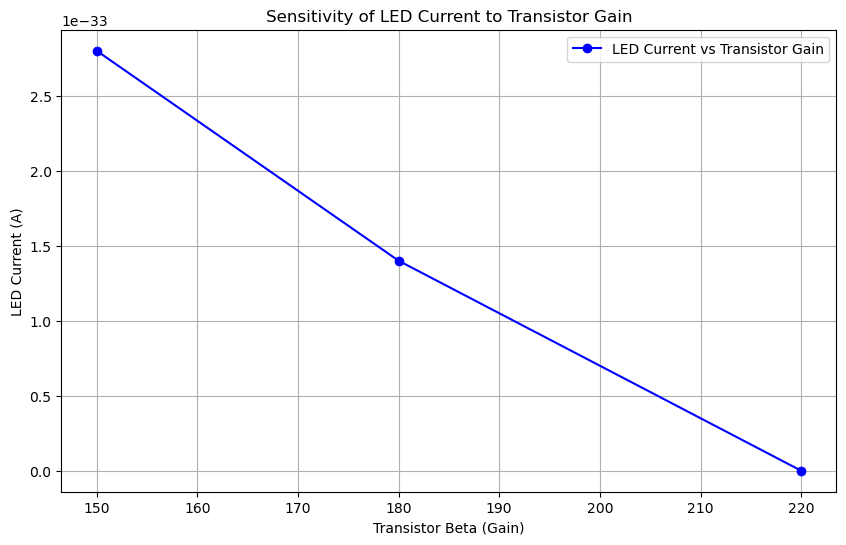

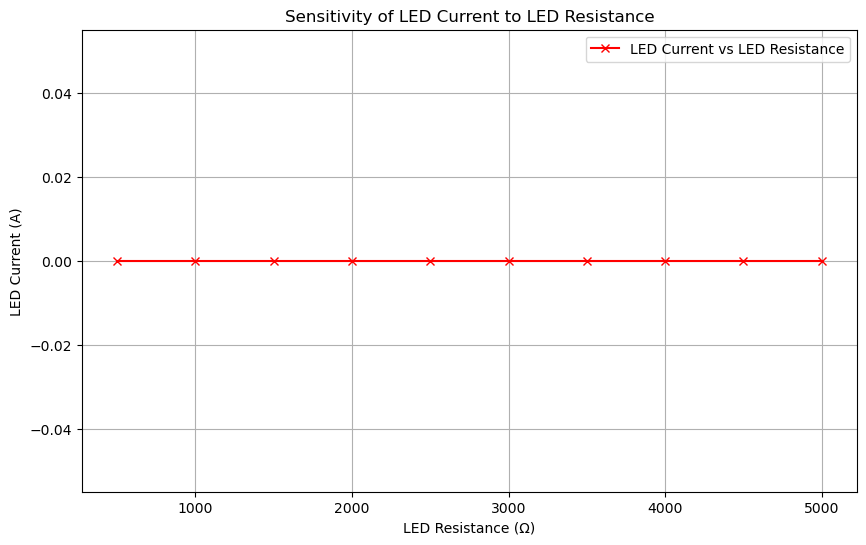

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Transistor and LED Sensitivity')

circuit.V(1, 'Vin', circuit.gnd, 5@u_V)  # Vin = 5V
R1 = 10@u_kΩ  # R1 = 10kΩ
R2 = 5@u_kΩ   # R2 = 5kΩ
circuit.R(1, 'Vin', 'Vout', R1)
circuit.R(2, 'Vout', circuit.gnd, R2)

# Transistor Gain (Beta) values
transistor_gain = [150, 180, 220]  # Different Beta values for the transistor
led_current_transistor = []

# Simulation for transistor gain variation
for idx, beta in enumerate(transistor_gain):
    model_name = f'Q_{idx+1}'  # Change model name dynamically
    circuit.model(model_name, 'NPN', BF=beta)  # Change transistor gain
    circuit.Q(idx+1, 'Collector', 'Base', 'Emitter', model=model_name)
    
    simulator = circuit.simulator(temperature=25)
    analysis = simulator.operating_point()
    
    # Collect data for LED current with varying transistor gain
    led_current_transistor.append(float(analysis['Collector'].item()))  # Use .item() to extract scalar

# LED Resistance (Ω) values
led_resistances = np.linspace(500, 5000, 10)  # Different LED resistances
led_current_led = []

# Simulation for LED resistance variation
for idx, resistance in enumerate(led_resistances):
    resistor_name = f'R2_{idx+1}'  # Change resistor name dynamically
    circuit.R(resistor_name, 'Vout', circuit.gnd, resistance@u_Ω)  # Change LED resistance
    
    # Perform DC operating point analysis
    analysis = simulator.operating_point()
    
    # Collect data for LED current with varying LED resistance
    led_current_led.append(float(analysis['Collector'].item()))  # Use .item() to extract scalar

# Plot 1: Sensitivity of LED Current to Transistor Gain (Beta)
plt.figure(figsize=(10, 6))
plt.plot(transistor_gain, led_current_transistor, marker='o', label="LED Current vs Transistor Gain", color='b')
plt.title('Sensitivity of LED Current to Transistor Gain')
plt.xlabel('Transistor Beta (Gain)')
plt.ylabel('LED Current (A)')
plt.grid(True)
plt.legend()

# Plot 2: Sensitivity of LED Current to LED Resistance
plt.figure(figsize=(10, 6))
plt.plot(led_resistances, led_current_led, marker='x', label="LED Current vs LED Resistance", color='r')
plt.title('Sensitivity of LED Current to LED Resistance')
plt.xlabel('LED Resistance (Ω)')
plt.ylabel('LED Current (A)')
plt.grid(True)
plt.legend()

plt.show()


- The first graph shows the sensitivity of LED current to changes in transistor gain, and the second graph shows the sensitivity of LED current to variations in LED resistance.

# 8- Solving for an Unknown Resistance  
A voltage divider can be used to determine an unknown resistance 𝑅2 by combining it with a fixed resistance 𝑅1 . For example, 𝑅2 could be a temperature-dependent resistor (thermistor) or a light-dependent resistor (LDR). Here's a step-by-step explanation:  
1.  Voltage Divider Formula  
The output voltage 𝑉out is given by the standard voltage divider equation:  
$$
V_{out} = \frac{R_2} {R_1 + R_2 } . V_{int}
$$  
Rearranging to express the fraction f:  
$$
f = \frac{V_{out}}{ V_{in}} = \frac{R_2} {R_1 + R_2}
$$  
2.  Solving for 𝑅2 in Terms of 𝑅1 and 𝑓 

From the voltage divider formula:  
$$  
f = \frac{R_2}{R_1 + R_2}
$$  
Rearrange to isolate R2:  
1. Multiply both sides by R1 + R2:
$$
f.(R_1 + R_2) = R_2
$$  
2. Expand and rearrange terms:  
$$
f.R_1 + f.R_2 = R_2
$$  
3. Factor 𝑅2 on the right-hand side:  
$$
f.R_1 = R_2 . (1-f)
$$  
4. Solve for R2:
$$
R_2 = \frac{R_1 . f} {1-f}
$$

3.      Steps to Calculate R2  
:
1. Measure 𝑉out : Use a multimeter or analog-to-digital converter (ADC).
2. Calculate 𝑓: Using f = $ \frac{V_{out}}{v_in}$  
3. Substitute 𝑓 and R1: Into R2 = $ \frac{f.R_1}{1-f}$ to find R2
​
4.  Example Calculation  

Let’s assume the following values:  
- R1 =10kΩ
- Vin =5V
- Measured 𝑉out =3V  

Step 1: Calculate 𝑓  
$$
f = \frac{V_{out}}{V_{in}} = \frac{3}{5} = 0.6
$$

Step 2: Calculate 𝑅2  

Substitute 𝑓 = 0.6 and 𝑅1 = 10kΩ into the formula:
$$
R_2 = \frac{f.R_1}{1-f} = \frac{0.6 . 10kΩ}{1- 0.6}
$$

Thus, 𝑅2 = 15kΩ.  


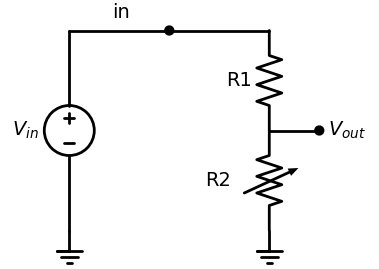

In [132]:
import schemdraw
from schemdraw import elements as elm

with schemdraw.Drawing() as d: # voltage source with two resistors in series
    elm.Ground()
    V = elm.SourceV().label(r'$V_{in}$').length(4)
    elm.Line().right(2).dot().label('in') # input voltage
    elm.Line().right(2)
    elm.Resistor().down(2).label("R1")
    elm.Line().right(1).dot().label(r'$V_{out}$', loc= 'right').hold() # output voltage
    elm.ResistorVar().reverse().down(2).label('R2')
    elm.Ground()

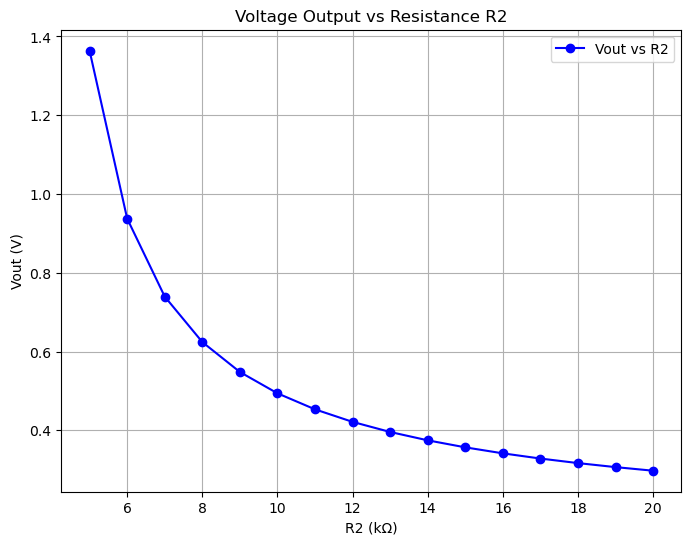

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Voltage Divider with Variable R2')

circuit.V(1, 'Vin', circuit.gnd, 5@u_V)  # Vin = 5V
circuit.R(1, 'Vin', 'Vout', 10@u_kΩ)  # R1 = 10kΩ
circuit.R(2, 'Vout', circuit.gnd, 15@u_kΩ)  # Initial R2 = 15kΩ

simulator = circuit.simulator(temperature=25, nominal_temperature=25)

# Resistance values for R2 in kΩ
resistances = np.arange(5, 21, 1)  # from 5kΩ to 20kΩ
voltages = []

# Simulate for each R2 value
for idx, r2 in enumerate(resistances):
    resistor_name = f'R2_{idx+1}'  # Change resistor name dynamically
    circuit.R(resistor_name, 'Vout', circuit.gnd, r2 @ u_kΩ)  # Change LED resistance
    
    # Perform operating point analysis
    analysis = simulator.operating_point()
    
    # Collect data for output voltage (Vout)
    Vout = float(analysis['Vout'].item())  # Extract scalar value from the analysis
    voltages.append(Vout)

# Plot the results: Output voltage vs R2
plt.figure(figsize=(8, 6))
plt.plot(resistances, voltages, marker='o', linestyle='-', color='b', label='Vout vs R2')
plt.title('Voltage Output vs Resistance R2')
plt.xlabel('R2 (kΩ)')
plt.ylabel('Vout (V)')
plt.grid(True)
plt.legend()
plt.show()


# 9- Applications  

Transistor Biasing:

- #### Biasing in Amplifier Circuits:
In transistor amplifiers, a voltage divider is used to set the correct biasing for the transistor's base. This ensures that the transistor operates in the active region, where it can amplify signals properly. The voltage divider provides a stable voltage to the base of the transistor, which helps control the current flowing through the transistor and determines the operating point of the amplifier.  

![Audio Amplifier using voltage divider transistors.](Single-Transistor-Audio-Amplifier.png)

- #### Switching Circuits:  
In switching applications, voltage dividers are used to bias the base of a transistor to switch it on or off, controlling the flow of current through the circuit. The divider adjusts the base voltage to the threshold required for turning the transistor on, enabling the circuit to work efficiently in response to signals.  


![Push button ON-OFF switch using transistors.](Switch-Circuit.jpg)

Explanation:   
In both amplifier and switching circuits, the voltage divider plays a crucial role in setting the transistor's operating point. The resistors in the voltage divider must be chosen carefully to ensure that the transistor receives the correct base voltage, ensuring efficient and reliable operation. This method is widely used in analog signal processing, radio frequency (RF) circuits, and digital switches.

# 10- Prohibited Uses of Voltage Dividers

- High-Power Circuits:  

Voltage dividers are inefficient for high-power applications, as they can waste energy through heat dissipation in the resistors. For high-current circuits like motor drives or high-power LEDs, it's better to use a voltage regulator or current controller to handle the power more efficiently.

- High-Precision Applications:  

Voltage dividers are not ideal for applications requiring precise voltage regulation, such as in medical devices or high-end audio systems. Component tolerances (e.g., resistors) can introduce inaccuracies. For stable and accurate voltage control, voltage regulators or operational amplifiers should be used.

# 11- Conclusion

Voltage dividers are simple yet powerful components in electronic circuits, commonly used to adjust voltage levels by utilizing two resistors in series. They offer a cost-effective solution for applications where precise voltage regulation is not critical. By adjusting the resistor values, the output voltage is directly proportional to the input voltage, making them ideal for tasks such as biasing transistors or current limiting in LED circuits.

However, there are limitations to their use. Voltage dividers are inefficient in high-power applications due to power dissipation, and their performance can be affected by the load connected to them. Additionally, they are not suitable for applications requiring precise voltage control, where component tolerances can introduce inaccuracies. When used appropriately, voltage dividers can enhance circuit performance and reduce costs, but their limitations must be carefully considered for each application.

# 12- References

- https://ultimateelectronicsbook.com/voltage-dividers
- https://resources.pcb.cadence.com/blog/voltage-dividers-operations-and-functions
- https://spinningnumbers.org/a/voltage-divider-design.html